# Prática Guiada: Regularização.


#### Até agora, quando ajustamos modelos lineares, selecionamos o modelo que minimizava o erro quadrático.

#### Para um modelo da forma:

$$
y_i = f(x_i) + e_i
$$

#### minimizamos a soma:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

#### Este é um exemplo de _função de custo_: uma função que mede o "custo" dos erros das previsões de um modelo. Para aplicar a técnica de regularização modificamos a função de custo, agregando um termo que penaliza os modelos por sua complexidade. Por exemplo, poderíamos ter uma nova função de custo dessa forma:

$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$

#### Onde o vetor $\theta$ corresponde aos parâmetros do nosso modelo e $\alpha$ é um parâmetro que controla quão forte é a penalização. Um valor de $\alpha$ maior, significa uma penalização maior, já que aumenta o custo, que é o que queremos minimizar.

#### O exemplo clássico é ajustar um polinômio a um dataset pequeno. Vejamos como funciona com um datset de exemplo.

#### Primeiramente vamos definir a função mágica [`@matplotlib inline`](), aí podemos importar o [módulo python](https://www.pythonforbeginners.com/random/how-to-use-the-random-module-in-python) [`random`](https://docs.python.org/3/library/random.html) para a geração de números aleatórios.


#### Os pacotes [`numpy`](numpy.org) para o tratamento dos dados, [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) para a geração dos gráficos, [`sklearn.dataset`](https://scikit-learn.org/stable/datasets/index.html) para a obtenção do dataset que usaremos e [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) para a modelização do problemas também devem ser importados.

In [1]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import warnings
warnings.filterwarnings('ignore')

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import warnings
warnings.filterwarnings('ignore')
-->

#### Depois disso podemos definir algumas características dos gráficos que vamos plotar instanciando o objeto [`plt.rcParams`](https://matplotlib.org/3.2.2/api/matplotlib_configuration_api.html#matplotlib.rcParams), projetado para a manipulação de valores padrão `matplotlib`, é possível customizar os valores de [`rcParams[]`](https://matplotlib.org/3.2.2/tutorials/introductory/customizing.html) de acordo com a preferência. Vamos também definir uma semente [`.seed()`](https://pynative.com/python-random-seed/) para a geração aleatória de dados.


In [2]:
plt.rcParams['figure.figsize'] = (8, 8)
random.seed(5)

####  <span style = "color:red">Código Original.</span>
<!---
plt.rcParams['figure.figsize'] = (8, 8)
random.seed(5)
-->

#### Vamos agora definir uma função própria `generate_data()`, para a geração de um `dataset` de trabalho. Vamos criar um arranjo
[`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) de dimensões `(-3, 3, 1)`, definir um objeto `data` que receba valores aleatórios, gerados pela função [`random.random()`](https://docs.python.org/3/library/random.html), dentro do intervalo estabelecido.

#### A função deve ainda ordenar os valores de `data`, com a função [`.sort()`](https://docs.python.org/3/library/stdtypes.html#list.sort) e retornar os valores (xs, ys) de saída dos dados gerados.

In [3]:
# Geramos um dataset de exemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    #print(xs)
    data = [(2 * x - 3 * random.random(), 
             (x - 3*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    #print(data)
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys
xs, ys = generate_data()

In [4]:
print(xs)
print(ys)

[-7.868705084669106, -6.8273508513311505, -2.087015684850844, -1.9469236594107726, 0.5927928566535088, 2.2781764362156975]
[11.520909484008026, 4.5474606036694905, 0.13576647035349249, -0.3059619276753641, 0.4018123953876509, 4.346247756315739]


####  <span style = "color:red">Código Original.</span>
<!---
# Geramos um dataset de exemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 3*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys
-->

#### Agora podemos usar a função [`plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) para plotar os pontos que geramos na célula anterior.

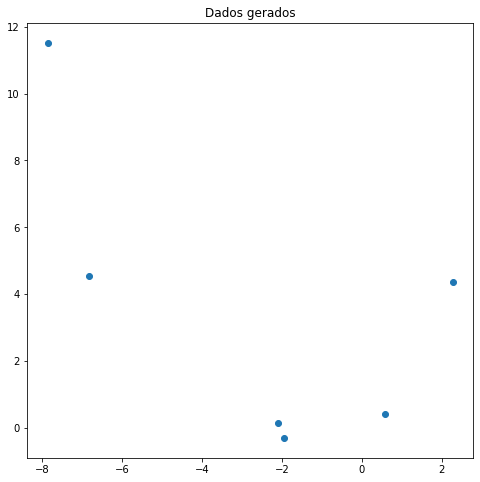

In [5]:
plt.scatter(xs, ys)
plt.title("Dados gerados")
plt.show()

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs, ys)
plt.title("Dados gerados")
plt.show()
-->

#### Agora, vamos tentar ajustar um modelo, para isso vamos instanciar um objeto `lm` que receberá o modelo [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### Diferente do que fizemos antes, vamos aqui aplicar a função [`np.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) que gera uma matriz com os termos de uma progressão geométrica em cada linha, também conhecida como matriz de [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix), Aqui vamos definir as quantidades `X = np.vander(xs, 4)` e `y = ys`.

#### O próximo passo é ajustar os dados gerados com o método [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) e então realizar as previsões para `X` com o método [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict).


#### Então podemos plortar as dispersões entre `xs`, `ys` e as previsões `predictions`, com a função `plt.scatter()`.

#### Com a aplicação do método [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) obtemos os valores do coeficiente de determinação $R^{2}$.

#### Se tentarmos ajustar um modelo de grau 4, obteremos o que chamamos de modelo superajustado.

[[-4.87202833e+02  6.19165197e+01 -7.86870508e+00  1.00000000e+00]
 [-3.18241391e+02  4.66127196e+01 -6.82735085e+00  1.00000000e+00]
 [-9.09027745e+00  4.35563447e+00 -2.08701568e+00  1.00000000e+00]
 [-7.37983698e+00  3.79051174e+00 -1.94692366e+00  1.00000000e+00]
 [ 2.08309408e-01  3.51403371e-01  5.92792857e-01  1.00000000e+00]
 [ 1.18239359e+01  5.19008787e+00  2.27817644e+00  1.00000000e+00]]
[11.520909484008026, 4.5474606036694905, 0.13576647035349249, -0.3059619276753641, 0.4018123953876509, 4.346247756315739]


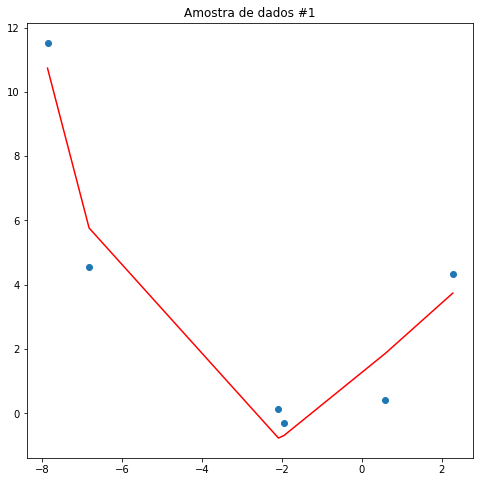

r^2: 0.9450313498052652


In [6]:
lm = linear_model.LinearRegression()

# Esta função de numpy gera a matriz polinômica a partir de uma série de valores
X = np.vander(xs, 4)
print(X)
y = ys
print(y)

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, color = 'r')
plt.show()
print ("r^2:", model.score(X, y))

####  <span style = "color:red">Código Original.</span>
<!---
lm = linear_model.LinearRegression()

# Esta função de numpy gera a matriz polinômica a partir de uma série de valores
X = np.vander(xs, 4)
#print(np.vander(xs, N = 4))
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions)
plt.show()
print ("r^2:", model.score(X, y))
-->

#### Se aplicarmos esse mesmo modelo a uma nova amostra de dados gerados pela mesma função, veremos que não se ajusta muito bem. Ou melhor, veremos que se ajusta consideravelmente pior.

#### Vamos repetir o processo anterior para os novos dados `xs2` e `ys2`.

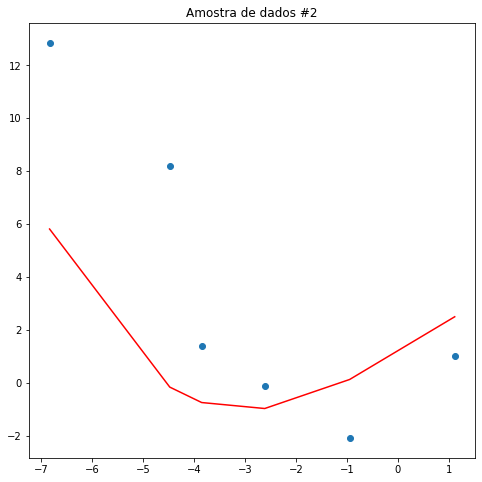

r^2: 0.20020821820869683


In [7]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, color = 'r')
plt.show()
print ("r^2:", model.score(X, ys2))

####  <span style = "color:red">Código Original.</span>
<!---
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions)
plt.show()
print ("r^2:", model.score(X, ys2))
-->

##  <span style = "color:Blue">Prática Independente 1.</span>
<!---

-->

#### Repita os passos anteriores, criando um arranjo diferente de dados, você pode criar uma nova lista de dados a partir da função `generate_data()` definida anteriormente, pode alterar as equações que geram os dados ou pode definir uam nova função.

####  <span style = "color:red">Código Original.</span>
<!---
# Geramos um dataset de exemplo
def generate_data2():
    xs = np.arange(-3, 3, 1)
    #data = [(2 * x - 3 * random.random(), (x - 3 * random.random()) * (x + random.random())) for x in xs]
    data = [(3 * x - 2 * random.random(), (x + 2 * random.random()) * (x - random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys
xs_PI1, ys_PI1 = generate_data2()
-->

#### Plote a dispersão dos dados que você gerou.

####  <span style = "color:red">Código Original.</span>
<!---
# Traçamos
plt.scatter(xs_PI1, ys_PI1);
plt.title("Dados gerados")
plt.show()
-->

#### Agora defina um modelo de regressão para tentarmos ajustar esses pontos, ao fim imprima na tela os valores dos atributos descritivos e da previsão do modelo.

####  <span style = "color:red">Código Original.</span>
<!---
lm = linear_model.LinearRegression()

# Esta função de numpy gera a matriz polinômica a partir de uma série de valores
X = np.vander(xs_PI1, 4)
#print(np.vander(xs, N = 4))
y = ys_PI1

model = lm.fit(X, y)
predictions = lm.predict(X)
print(X)
print(predictions)
-->

#### Plote os pontos gerados e o modelo que os ajusta.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs_PI1, ys_PI1)
plt.title("Amostra de dados #1")
plt.plot(xs_PI1, predictions, color = 'r')
plt.show()
print ("r^2:", model.score(X, y))
-->

#### Chame novamente a função que você criou para gerar números aleatórios, realize novas previsões

####  <span style = "color:red">Código Original.</span>
<!---
xs2_PI1, ys2_PI1 = generate_data2()
X = np.vander(xs2_PI1, 4)
predictions = lm.predict(X)
-->

#### Plote os novos dados e as novas previões, sem modificar o ajute realizado.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs2_PI1, ys2_PI1)
plt.title("Amostra de dados #2")
plt.plot(xs2_PI1, predictions, color = 'r')
plt.show()
print ("r^2:", model.score(X, ys2_PI1))
-->

## Regressão regularizada.

#### A regularização é um método de penalização de atributos extras em um modelo.

## Ridge Regression

#### Vamos usar scikit-learn para ajustar uma regressão com regularização, como a que descrevemos no início do notebook. Esta forma de regularização se chama _ridge regression_ , em inglês. Na regressão Ridge ([Tikhonov Regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization)) queremos minimar a seguinte expressão:


<center>$RSS + \alpha\sum_{j=1}^{p} \beta_{j}^{2}$</center>



#### Para aplicar o modelo de regularização de Ridge devemos importar a bilbioteca correspondente  [`sklearn.linear_model.Ridge()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Devemos instanciar um modelo `rlm` com a função [`linear_model.Ridge()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), observe o parâmetro `alpha = 10`.


#### Aplicamos novamente a função [`np.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) que gera uma matriz com os termos de uma progressão geométrica em cada linha, também conhecida como matriz de [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix), assim com os métodos `.fit()` e `.predict()` para ajuste e predição dos dados.

####  Prof fim podemos plotar um gráfico com a relação entre os pontos  observamos e aqueles previstos, usando o método `.scatter()`. O método método [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) obtemos os valores do coeficiente de determinação $R^{2}$.

[[-4.87202833e+02  6.19165197e+01 -7.86870508e+00  1.00000000e+00]
 [-3.18241391e+02  4.66127196e+01 -6.82735085e+00  1.00000000e+00]
 [-9.09027745e+00  4.35563447e+00 -2.08701568e+00  1.00000000e+00]
 [-7.37983698e+00  3.79051174e+00 -1.94692366e+00  1.00000000e+00]
 [ 2.08309408e-01  3.51403371e-01  5.92792857e-01  1.00000000e+00]
 [ 1.18239359e+01  5.19008787e+00  2.27817644e+00  1.00000000e+00]]
[11.520909484008026, 4.5474606036694905, 0.13576647035349249, -0.3059619276753641, 0.4018123953876509, 4.346247756315739]


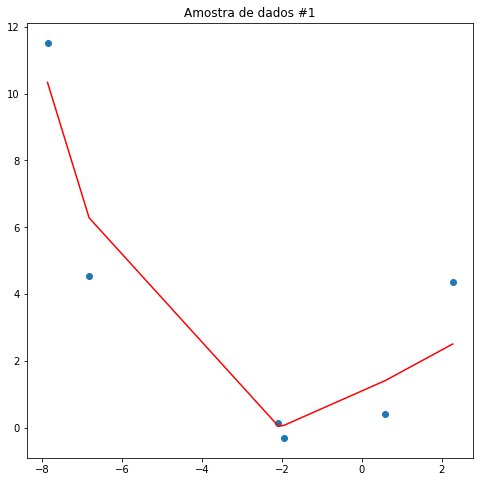

r^2: 0.911649018598219


In [14]:
rlm = linear_model.Ridge(alpha = 10)

# Ajustamos novamente, desta vez com regularização
X = np.vander(xs, 4)
print(X)
y = ys
print(y)
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, color = 'r')
plt.show()
print ("r^2:", ridge_model.score(X, ys))

####  <span style = "color:red">Código Original.</span>
<!---
rlm = linear_model.Ridge(alpha=10)

# Ajustamos novamente, desta vez com regularização
X = np.vander(xs, 4)
y = ys
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions)
plt.show()
print ("r^2:", ridge_model.score(X, ys))
-->

#### Se aplicarmos esse mesmo modelo a uma nova amostra de dados gerados pela mesma função, veremos que não se ajusta muito bem. Ou melhor, veremos que se ajusta consideravelmente pior.

#### Vamos repetir o processo anterior para os novos dados `xs2`.

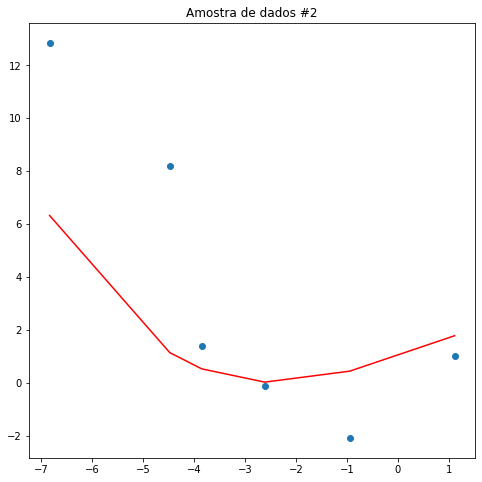

r^2: 0.39243905940904156


In [15]:
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, color = 'r')
plt.show()
print ("r^2:", ridge_model.score(X, ys2))

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados#2")
plt.plot(xs2, predictions)
plt.show()
print ("r^2:", ridge_model.score(X, ys2))
-->

#### Note que o ajuste da _ridge regression_ piorou um pouco (ou seja, não foi tão bom) na amostra 

- #1. Por outro lado, a melhoria foi notável na amostra. 
- #2. Isto acontece porque a regularização busca prevenir o superajuste (overfitting).

#### Se quiserem ver outro exemplo de ridge regularization, leiam [este](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html) da documentação oficial de scikit-learn.

##  <span style = "color:Blue">Prática Independente 2.</span>
<!---

-->

#### Crie um objeto que receberá o modelo de regressão com regularização de Ridge.

####  <span style = "color:red">Código Original.</span>
<!---
rlm = linear_model.Ridge(alpha = 10)
-->

#### Faça um novo ajuste dos dados da Prática Independente 2 e realize novas predições.

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos novamente, desta vez com regularização
X = np.vander(xs_PI1, 4)
y = ys_PI1
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)
-->

#### Plote novamente os pontos gerados na Prática Independente 1 e também o novo modelo, agora regularizado pelo método Ridge.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs_PI1, ys_PI1)
plt.title("Amostra de dados #1")
plt.plot(xs_PI1, predictions, color = 'r')
plt.show()
print ("r^2:", ridge_model.score(X, ys_PI1))
-->

#### Agora repita o processor

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2_PI1, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2_PI1, ys2_PI1)
plt.title("Amostra de dados #2")
plt.plot(xs2_PI1, predictions, color = 'r')
plt.show()
print ("r^2:", ridge_model.score(X, ys2_PI1))
-->

#### O que você observou depois da regularização de Ridge?

## Lasso.

#### Vamos também usar scikit-learn para ajustar nossa regressão com a regularização do tipo __Lasso Regression__. Na regressão Lasso ([Least Absolute Shrinkage and Selection Operator](https://en.wikipedia.org/wiki/Lasso_(statistics))) queremos minimar a seguinte expressão:

<center>$RSS + \lambda\sum_{j=1}^{p} |\beta_{j}|$</center>

#### Para aplicar o modelo de regularização de Lasso devemos importar a bilbioteca correspondente  [`sklearn.linear_model.Lasso()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). Devemos instanciar um modelo `rlm` com a função [`linear_model.Lasso()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), observe os parâmetros `alpha = 0.5` e `normalize = True`.


#### Aplicamos novamente a função [`np.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) que gera uma matriz com os termos de uma progressão geométrica em cada linha, também conhecida como matriz de [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix), assim com os métodos `.fit()` e `.predict()` para ajuste e predição dos dados.

####  Prof fim podemos plotar um gráfico com a relação entre os pontos  observamos e aqueles previstos, usando o método `.scatter()`. O método método [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) obtemos os valores do coeficiente de determinação $R^{2}$.

r^2: 0.6774247705250354


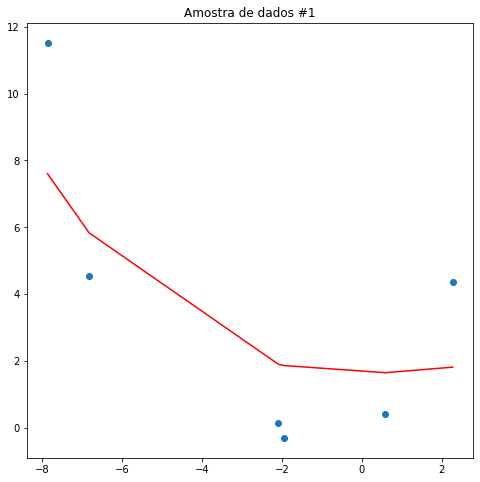

In [20]:
lasso = linear_model.Lasso(alpha = 0.5, normalize = True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys
lasso_model =lasso.fit(X, y)
predictions = lasso_model.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, color ='r')

print ("r^2:", lasso_model.score(X, ys))

####  <span style = "color:red">Código Original.</span>
<!---
lasso = linear_model.Lasso(alpha = 0.5, normalize = True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys
lasso_model =lasso.fit(X, y)
predictions = lasso_model.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, c='r')

print ("r^2:", lasso_model.score(X, ys))
-->

#### Se aplicarmos esse mesmo modelo a uma nova amostra de dados gerados pela mesma função, veremos que não se ajusta muito bem. Ou melhor, veremos que se ajusta consideravelmente pior.

#### Vamos repetir o processo anterior para os novos dados `xs2`.

r^2: 0.4194240939869016


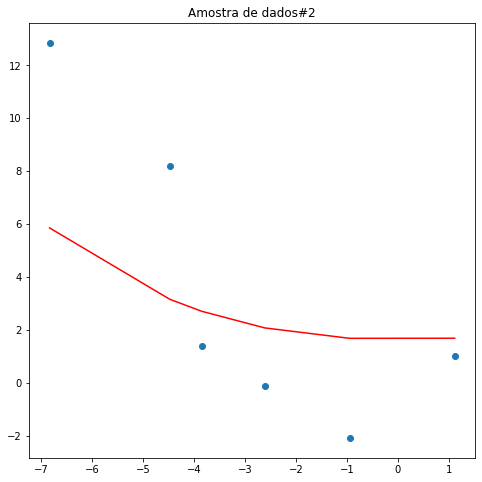

In [21]:
X = np.vander(xs2, 4)[:,:-1]
predictions = lasso_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados#2")
plt.plot(xs2, predictions, c = 'r')

print ("r^2:", lasso_model.score(X, ys2))

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2, 4)[:,:-1]
predictions = lasso_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados#2")
plt.plot(xs2, predictions, c='r')

print ("r^2:", lasso_model.score(X, ys2))
-->

#### amos ver os coeficientes da regressão de Lasso [`lasso_model.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html):

In [22]:
lasso_model.coef_

array([-0.00605141,  0.04889947, -0.        ])

####  <span style = "color:red">Código Original.</span>
<!---
lasso_model.coef_
-->

##  <span style = "color:Blue">Prática Independente 3.</span>
<!---

-->

#### Agora crie um objeto que deva receber a função de regressão regularizada pelo método Lasso

####  <span style = "color:red">Código Original.</span>
<!---
lasso = linear_model.Lasso(alpha = 0.5, normalize = True)
-->

#### Utilize novamente os dados que você gerou na Prática Independente 1 e faça o ajuste do modelo, adotando o método Lasso de regularização. Faça novas previsões.

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs_PI1, 4)[:,:-1]
y = ys_PI1
lasso_model = lasso.fit(X, y)
predictions = lasso_model.predict(X)
-->

#### Plot a dispersão dos novos dados, juntamente com o modelo calculado.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs_PI1, ys_PI1)
plt.title("Amostra de dados #1")
plt.plot(xs_PI1, predictions, color = 'r')

print ("r^2:", lasso_model.score(X, ys_PI1))
-->

#### Use o segundo de dados gerados na Prática Independente 1 e aplique novamente o modelo regularizado pelo método Lasso.

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2_PI1, 4)[:,:-1]
predictions = lasso_model.predict(X)

plt.scatter(xs2_PI1, ys2_PI1)
plt.title("Amostra de dados#2")
plt.plot(xs2_PI1, predictions, color = 'r')

print ("r^2:", lasso_model.score(X, ys2_PI1))
-->

#### Discuta suas observações.

## ElasticNet.

#### Vamos também usar scikit-learn para ajustar nossa regressão com a regularização do tipo __ElasticNet Regression__.  A regularização de rede elástica ([ElasticNet](https://en.wikipedia.org/wiki/Elastic_net_regularization)) é um método de regressão regularizado que combina linearmente as penalidades $L_{1}$ e $L_{2}$ dos métodos laço e cordão.


#### Para aplicar o modelo de regularização ElasticNet devemos importar a bilbioteca correspondente  [`sklearn.linear_model.ElasticNet()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html). Devemos instanciar um modelo `rlm` com a função [`linear_model.ElasticNet()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), observe os parâmetros `alpha = 0.5` e `normalize = True`.

#### Aplicamos novamente a função [`np.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) que gera uma matriz com os termos de uma progressão geométrica em cada linha, também conhecida como matriz de [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix), assim com os métodos `.fit()` e `.predict()` para ajuste e predição dos dados.

####  Prof fim podemos plotar um gráfico com a relação entre os pontos  observamos e aqueles previstos, usando o método `.scatter()`. O método método [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) obtemos os valores do coeficiente de determinação $R^{2}$.

r^2: 0.5540874979410444


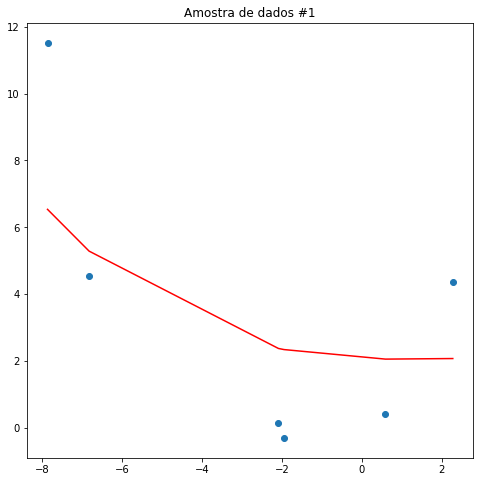

In [27]:
elastic_net = linear_model.ElasticNet(alpha = 0.5, normalize = True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

elastic_net.fit(X, y)
predictions = elastic_net.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, color = 'r')

print ("r^2:", elastic_net.score(X, ys))

####  <span style = "color:red">Código Original.</span>
<!---
elastic_net = linear_model.ElasticNet(alpha = 0.5, normalize = True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

elastic_net.fit(X, y)
predictions = elastic_net.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, c='r')

print ("r^2:", elastic_net.score(X, ys))
-->

#### Se aplicarmos esse mesmo modelo a uma nova amostra de dados gerados pela mesma função, veremos que não se ajusta muito bem. Ou melhor, veremos que se ajusta consideravelmente pior.

#### Vamos repetir o processo anterior para os novos dados `xs2`.

r^2: 0.3362123797028943


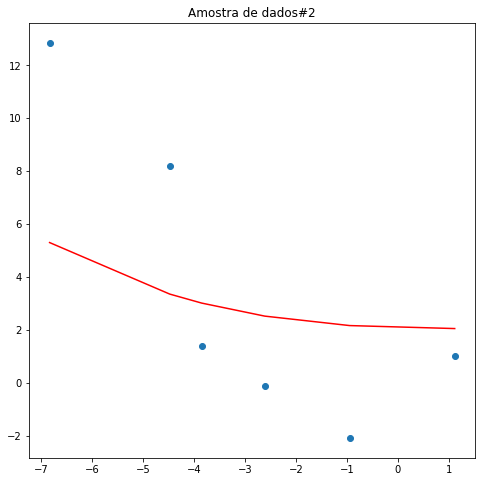

In [28]:
X = np.vander(xs2, 4)[:,:-1]
predictions = elastic_net.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados#2")
plt.plot(xs2, predictions, color = 'r')
print ("r^2:", elastic_net.score(X, ys2))

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2, 4)[:,:-1]
predictions = elastic_net.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados#2")
plt.plot(xs2, predictions, c='r')
print ("r^2:", elastic_net.score(X, ys2))
-->

#### Vejamos os coeficientes da regressão ElasticNet.

In [29]:
elastic_net.coef_

array([-0.00408996,  0.03280451, -0.05583325])

####  <span style = "color:red">Código Original.</span>
<!---
elastic_net.coef_
-->

## Otimizando o hiperparâmetro $\alpha$. 

#### Você deve ter notado que, no exemplo, definimos o hyperparametro `alpha = 10`. Essa foi uma decisão arbitrária e existem maneiras de determinar esse valor empiricamente.

#### Em geral, devemos decidir como escolher o parâmetro `alpha` e existem maneiras automáticas de fazê-lo. Uma maneira de fazer isso é com _validação-cruzada_ ou _cross-validation_ em inglês. Para esta prática guiada, vamos explorar o modelo de Ridge, que nos permite adotar a funcionalidade do [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

#### Normalmente, a validação cruzada funciona separando nosso conjunto de dados entre dados para ajustar o modelo (conjunto de treinamento) e dados para avaliar o modelo (conjunto de teste).


#### Nesse caso, o modelo que geramos com o [`linear_model.RidgeCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) do scikit-learn testa automaticamente valores diferentes de `alpha`. Execute o código a seguir mais de uma vez. Você deve ver que escolhe valores diferentes de `alpha`, pois faz separações diferentes dos dados a cada vez.

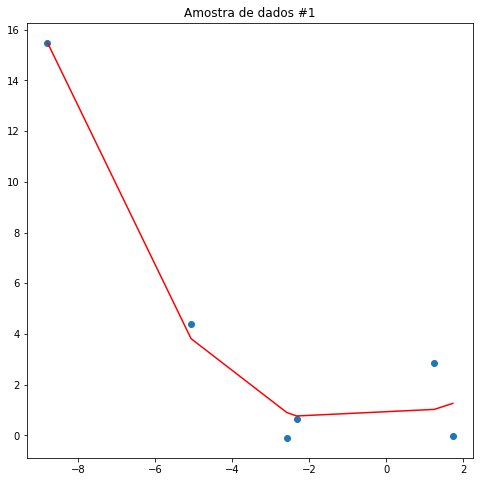

r^2: 0.9638596747059673
alpha: 0.01


In [30]:
rlmcv = linear_model.RidgeCV(alphas = np.linspace(0.01,100, 1000), cv = 5, normalize = True)
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys

rlmcv.fit(X, y)
predictions = rlmcv.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, color = 'r')
plt.show()
print ("r^2:", rlmcv.score(X, ys))
print ("alpha:", rlmcv.alpha_);


####  <span style = "color:red">Código Original.</span>
<!---
rlmcv = linear_model.RidgeCV(alphas = np.linspace(0.01,100, 1000), cv = 5, normalize = True)
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys

rlmcv.fit(X, y)
predictions = rlmcv.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys))
print ("alpha:", rlmcv.alpha_)
-->

#### Se aplicarmos esse mesmo modelo a uma nova amostra de dados gerados pela mesma função, veremos que não se ajusta muito bem. Ou melhor, veremos que se ajusta consideravelmente pior.

#### Vamos repetir o processo anterior para os novos dados `xs2`.

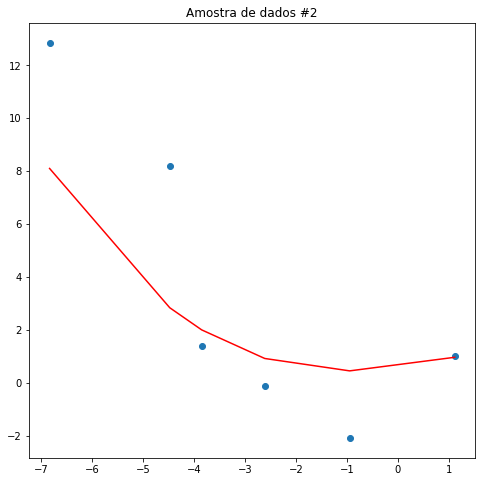

r^2: 0.6409702355694087


In [31]:
X = np.vander(xs2, 4)[:,:-1]
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, color = 'r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2, 4)[:,:-1]
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))
-->

#### Podemos também testar os hiperparâmetros com o modelo  [`linear_model.LassoCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) do scikit-learn testa automaticamente valores diferentes de `alpha`. Execute o código a seguir mais de uma vez. Você deve ver que escolhe valores diferentes de `alpha`, pois faz separações diferentes dos dados a cada vez.

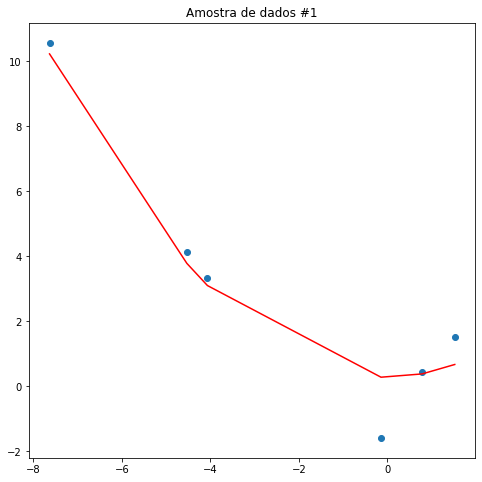

r^2: 0.948844123895342
alpha: 0.11009009009009008


In [32]:
lassocv = linear_model.LassoCV(alphas = np.linspace(0.01,100, 1000), cv = 5, normalize = True)
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys
lassocv.fit(X, y)
predictions = lassocv.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, color = 'r')
plt.show()
print ("r^2:", lassocv.score(X, ys))
print ("alpha:", lassocv.alpha_)

####  <span style = "color:red">Código Original.</span>
<!---
lassocv = linear_model.LassoCV(alphas = np.linspace(0.01,100, 1000), cv = 5, normalize = True)
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys
lassocv.fit(X, y)
predictions = lassocv.predict(X)

plt.scatter(xs, ys)
plt.title("Amostra de dados #1")
plt.plot(xs, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys))
print ("alpha:", lassocv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))
-->

#### Se aplicarmos esse mesmo modelo a uma nova amostra de dados gerados pela mesma função, veremos que não se ajusta muito bem. Ou melhor, veremos que se ajusta consideravelmente pior.

#### Vamos repetir o processo anterior para os novos dados `xs2`.

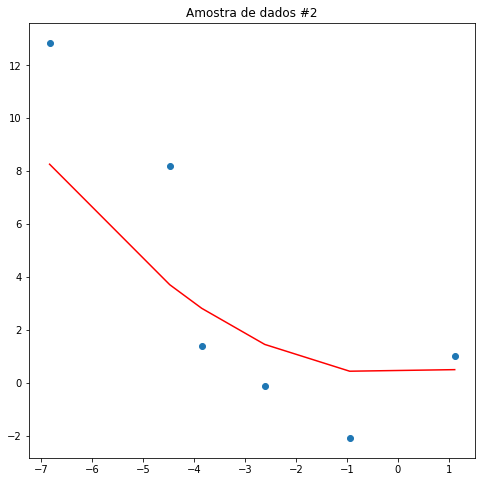

r^2: 0.6820377766916784


In [33]:
X = np.vander(xs2, 4)[:,:-1]
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, color = 'r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))

####  <span style = "color:red">Código Original.</span>
<!---
X = np.vander(xs2, 4)[:,:-1]
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))
-->

### Regularizações:

* Rigde: Melhor quando todas as variáveis do modelo são importantes.
  $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \sum_{i=1}^{N}\beta_i^{2}}$$
* Lasso: Melhor quando variáveis não improtantes ao modelo podem ser removidas.
  $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \sum_{i=1}^{N}|\beta_i|}$$
* Elastic net: Melhor quando vá muitas variáveis e você não as conhece muito bem. Combina as penalidades das regressões Lasso e Rigde. Bom para situações em que há correlação entre os parâmetros. $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha_{1} \sum_{i=1}^{N}\beta_i^{2}} + \alpha_{2} \sum_{i=1}^{N}|\beta_i| $$

##  <span style = "color:Blue">Prática Independente 4.</span>
<!---

-->

#### Agora você deve definir um objeto que receberá o modelo de regressão, regularizado com o método de `Ridge` e cujos valores de `alpha` tenham sido calculados automaticamente.

####  <span style = "color:red">Código Original.</span>
<!---
rlmcv = linear_model.RidgeCV(alphas = np.linspace(0.01,100, 1000), cv = 5, normalize = True)
xs_PI4, ys_PI4 = generate_data2()
-->

#### Realize o processo de ajuste e previsão dos dados.

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs_PI4, 4)[:,:-1]
y = ys_PI4
rlmcv.fit(X, y)
predictions = rlmcv.predict(X)
-->

#### Plote a dispersão dos dados gerados e o modelo ajustado, imprima na tela os valores do coeficiente de determinação `Rˆ2` e  de `alpha`, usando o método `.score()` e o atributo `.alpha_`.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs_PI4, ys_PI4)
plt.title("Amostra de dados #1")
plt.plot(xs_PI4, predictions, color = 'r')
plt.show()
print ("r^2:", rlmcv.score(X, ys_PI4))
print ("alpha:", rlmcv.alpha_);
-->

#### A seguir gere novos dados e faça novas previões, sem reajustar o modelo.

####  <span style = "color:red">Código Original.</span>
<!---
xs2_PI4, ys2_PI4 = generate_data2()
X = np.vander(xs2_PI4, 4)[:,:-1]
predictions = rlmcv.predict(X)
-->

#### Plote a nova dispersão dos pontos e o modelo cujo `alpha` otimizado foi calculado.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs2_PI4, ys2_PI4)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, color = 'r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))
-->

#### o que você observou nesse processo?

##  <span style = "color:Blue">Prática Independente 5.</span>
<!---

-->

#### Agora você deve definir um objeto que receberá o modelo de regressão, regularizado com o método de `Lasso` e cujos valores de `alpha` tenham sido calculados automaticamente.

####  <span style = "color:red">Código Original.</span>
<!---
lassocv = linear_model.LassoCV(alphas = np.linspace(0.01,100, 1000), 
                               cv = 5, 
                               normalize = True
                              )
xs_PI5, ys_PI5 = generate_data2()
-->

#### Realize o processo de ajuste e previsão dos dados.

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs_PI5, 4)[:,:-1]
y = ys_PI5
lassocv.fit(X, y)
predictions = lassocv.predict(X)
-->

#### Plote a dispersão dos dados gerados e o modelo ajustado, imprima na tela os valores do coeficiente de determinação `Rˆ2` e  de `alpha`, usando o método `.score()` e o atributo `.alpha_`.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs_PI5, ys_PI5)
plt.title("Amostra de dados #1")
plt.plot(xs_PI5, predictions, color = 'r')
plt.show()
print ("r^2:", lassocv.score(X, ys_PI5))
print ("alpha:", lassocv.alpha_)
-->

#### A seguir gere novos dados e faça novas previões, sem reajustar o modelo.

####  <span style = "color:red">Código Original.</span>
<!---
xs2_PI5, ys2_PI5 = generate_data2()
X = np.vander(xs2_PI5, 4)[:,:-1]
predictions = lassocv.predict(X)
-->

#### Plote a nova dispersão dos pontos e o modelo cujo `alpha` otimizado foi calculado.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(xs2, ys2)
plt.title("Amostra de dados #2")
plt.plot(xs2, predictions, 
         c ='r'
        )
plt.show()
print ("r^2:", lassocv.score(X, ys2))
-->

#### o que você observou nesse processo?

####  <span style = "color:blue">Código Original.</span>
<!---
[``]()
-->